In [1]:
# IMPORT PACKAGES
import os
import gc
import time
import pickle
#import webbrowser
## DASK
import dask.dataframe as dd
import dask
import dask.array as da
from dask_ml.preprocessing import StandardScaler

import torch
import numpy as np
import pandas as pd

from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from joblib import parallel_backend

import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import seaborn as sns
import pickle
import webbrowser as wb
from dask.distributed import Client, LocalCluster




c:\Users\efons\anaconda3\envs\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import COSMO_TL as ctl
from COSMO_TL import GammaLoaders as gl
from COSMO_TL import model as md
from COSMO_TL import sigma_functions as sf
torch = ctl.model.torch

In [3]:
model = md.NN(layers=3, layer_size=75)
df = gl.get_IDAC_df().compute()
df = df.dropna() 
df = df.reset_index(drop=True)
df

,Compound Name1,Compound Name2,ln_gamma1,ln_gamma2,sigma_0_1,sigma_1_1,sigma_2_1,sigma_3_1,sigma_4_1,sigma_5_1,...,TE(corr)_2,DE(corr)_2,q_2,"q+q""_2",Area_2,Volume_2,NE Solvation Energy_2,TE_2,TE(corr)+NE_2,mol_frac
0,1-NONADECANOL,DICUMYLPEROXIDE,"[2.19937, 1.47838, 1.17616, 0.963258, 0.796583...","[2.44357e-15, 0.0137283, 0.0376675, 0.0678265,...",0.0,0.0,0.0,0.0,0.0,0.0,...,-849.744048,-0.014137,-0.05018,-0.00179,311.46286,365.77785,5.040423,-849.735840,-849.736018,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."
1,N-DECYLBENZENE,CITRIC-ACID,"[7.35781, 6.488, 5.70323, 5.0014, 4.37511, 3.8...","[-2.54535e-17, 0.0221366, 0.0855566, 0.185603,...",0.0,0.0,0.0,0.0,0.0,0.0,...,-760.358791,-0.035115,-0.02548,-0.00065,193.07545,202.59300,3.839975,-760.352264,-760.352674,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."
2,ISOBUTYRONITRILE,"2,6-DIETHYLANILINE","[-0.333301, -0.301982, -0.27196, -0.243304, -0...","[-1.33803e-15, -0.000804568, -0.00324022, -0.0...",0.0,0.0,0.0,0.0,0.0,0.0,...,-444.971385,-0.013034,-0.04344,-0.00147,201.68715,207.53452,3.927298,-444.964894,-444.965129,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."
3,ALPHA-TERPINENE,ETHYL-N-HEXYL-ETHER,"[0.0224851, 0.0202446, 0.018126, 0.0161286, 0....","[2.26538e-15, 5.74181e-05, 0.000229162, 0.0005...",0.0,0.0,0.0,0.0,0.0,0.0,...,-390.998661,-0.006470,-0.04586,-0.00157,209.81357,200.80061,4.009700,-390.992394,-390.992274,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."
4,N-NONADECANE,N-BUTYLBENZENE,"[0.281938, 0.221526, 0.17396, 0.136356, 0.1065...","[4.14984e-15, 0.00149873, 0.00531317, 0.010649...",0.0,0.0,0.0,0.0,0.0,0.0,...,-389.586688,-0.006475,-0.04333,-0.00156,197.69481,196.40914,3.886815,-389.580441,-389.580496,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092887,FORMANILIDE,DODECANOL,"[-0.102367, -0.0525399, -0.00745067, 0.0324968...","[-5.21554e-11, -0.00126915, -0.00491279, -0.01...",0.0,0.0,0.0,0.0,0.0,0.0,...,-548.288681,-0.010872,-0.05561,-0.00188,287.15232,288.37440,4.793915,-548.280990,-548.281044,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."
1092888,SUCCINONITRILE,1-METHYL-4-ETHYLBENZENE,"[4.39954, 3.8253, 3.35053, 2.94297, 2.58484, 2...","[6.42192e-10, 0.0143132, 0.0525457, 0.110587, ...",0.0,0.0,0.0,0.0,0.0,0.0,...,-350.270970,-0.006163,-0.03966,-0.00136,177.98295,175.16542,3.686937,-350.265050,-350.265096,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."
1092889,P-TOLUALCOHOL,P-TERT-BUTYLPHENOL,"[-2.14656, -1.97777, -1.80415, -1.62703, -1.44...","[-1.66182e-10, -0.00438985, -0.0185335, -0.043...",0.0,0.0,0.0,0.0,0.0,0.0,...,-464.842783,-0.013099,-0.04186,-0.00151,196.85553,207.81201,3.878305,-464.836411,-464.836605,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."
1092890,4-HEPTANONE,1-NONANAL,"[-0.0147264, -0.0134569, -0.0122302, -0.011048...","[-1.29146e-12, -3.26575e-05, -0.000132226, -0....",0.0,0.0,0.0,0.0,0.0,0.0,...,-429.121294,-0.010576,-0.04493,-0.00129,222.06784,217.85230,4.133958,-429.114945,-429.114708,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."


In [6]:
#split data into train/test sets
train_df, test_df = md.split_within_solvent(df)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)


In [7]:
dT = 5
X_train, Y_train = md.get_vars(train_df, dt=dT)
X_test, Y_test = md.get_vars(test_df, dt=dT)
# make Y's 1 column by n rows
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)
# convert everything to from numpy to torch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32)


In [8]:
# scale the data using dask ml. First combine X_train and X_test into one array
X = torch.cat((X_train, X_test), 0)
# convert to dask array
#X = da.from_array(X)
# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
# convert all the train test
X_train = X[:len(X_train)]
X_test = X[len(X_train):]

In [9]:
# train the model
torch.cuda.empty_cache()
gc.collect()
loss = md.run_Pytorch(model, X_train, Y_train, n_epochs=11, batch_size=2056, learning_rate=0.001)

EPOCH :  0 , dt:  6.186701536178589 seconds, losses : 0.0990164652466774
EPOCH :  10 , dt:  23.839421033859253 seconds, losses : 0.017087075859308243


Text(0, 0.5, 'Loss')

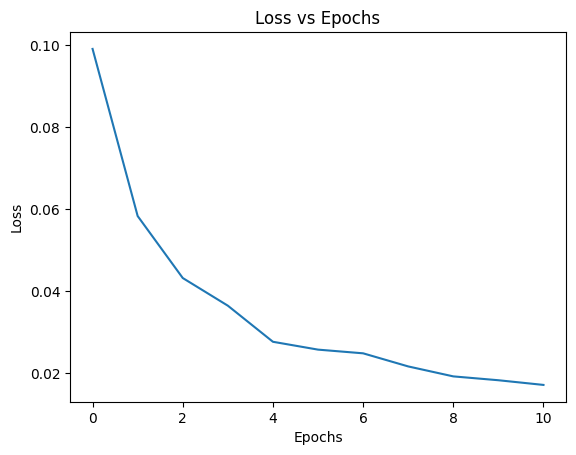

In [10]:
# plot the losses
plt.plot(loss)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')


(<Figure size 1920x1440 with 1 Axes>,
 <AxesSubplot: xlabel='COSMO-SAC $ln(\\gamma_1^\\infty)$', ylabel='NN $ln(\\gamma_1^\\infty)$'>)

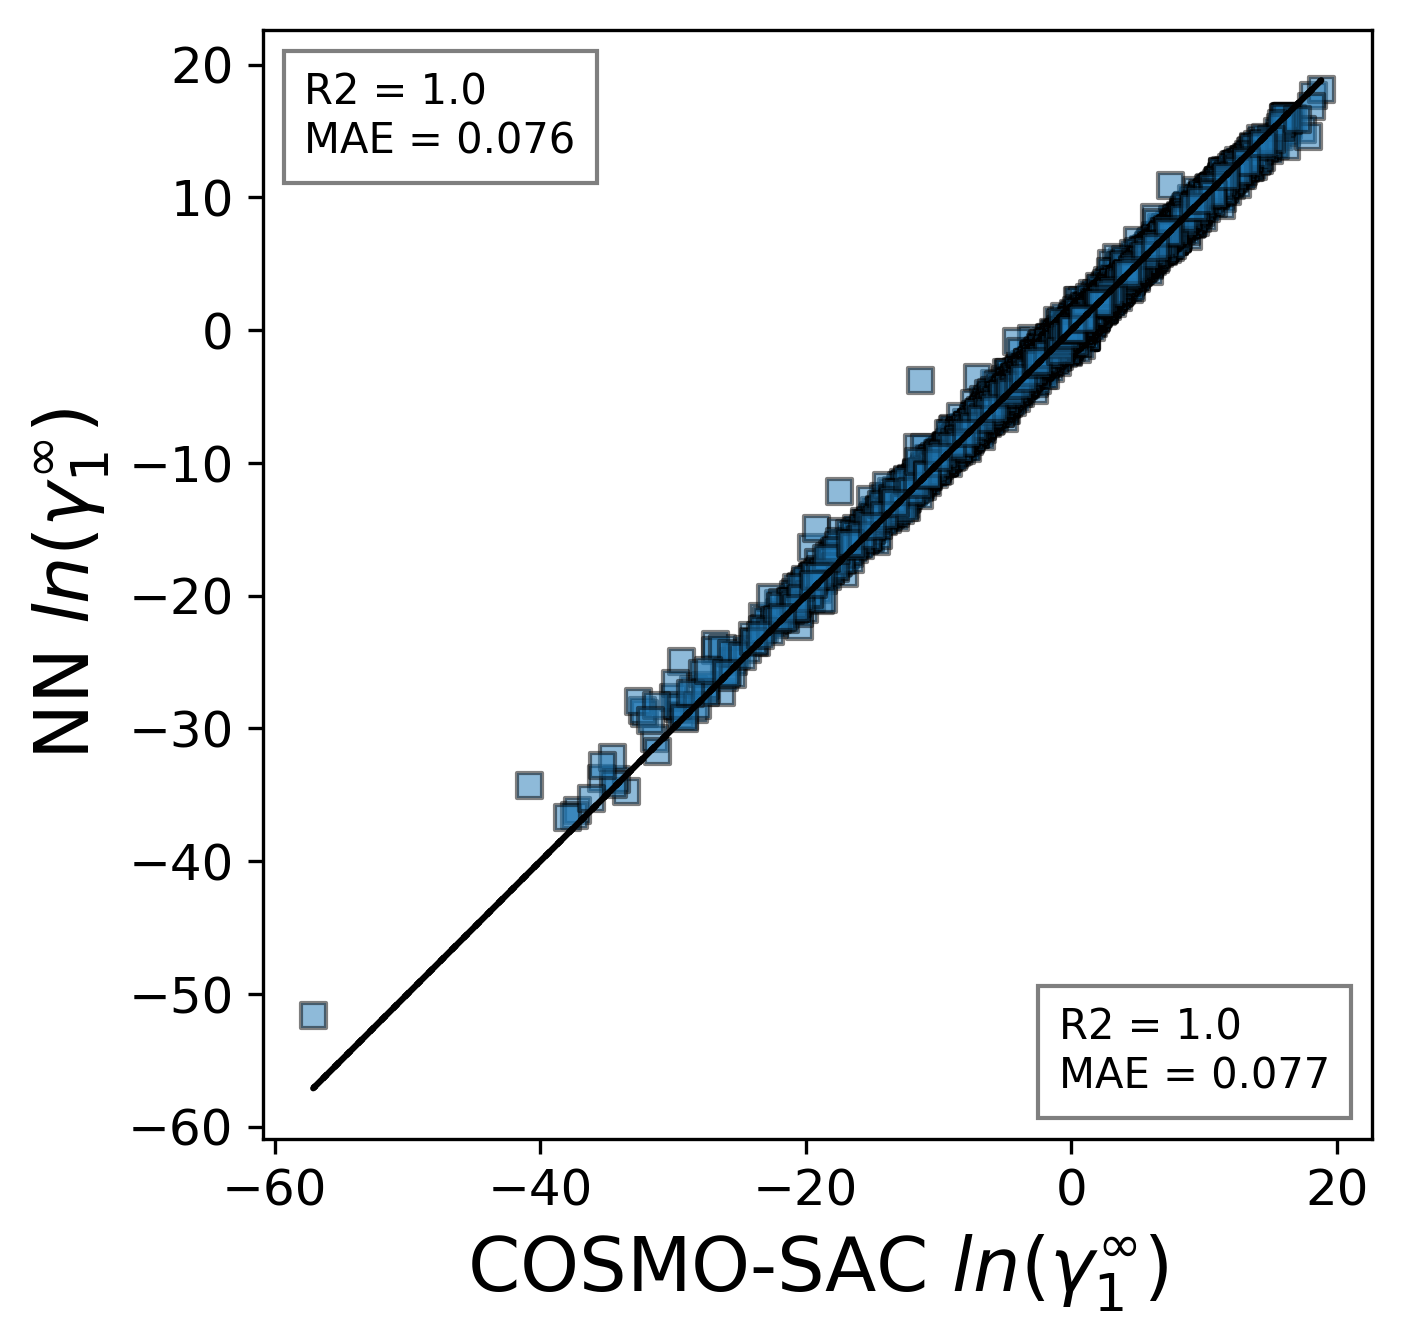

In [11]:
# send all the data to the CPU
torch.cuda.empty_cache()
X_train = X_train.to('cpu')
Y_train = Y_train.to('cpu')
X_test = X_test.to('cpu')
Y_test = Y_test.to('cpu')
model = model.to('cpu')


md.plot_parity(model, X_train, Y_train, X_test, Y_test)


In [14]:
nist_df = gl.get_nist_df()
nist_df = nist_df.reset_index(drop=True)
nist_df = nist_df[np.abs(nist_df['Temperature, K'] - 300) < dT].reset_index(drop=True)
train, test = md.split_within_solvent(nist_df, train_split=0.8, columns='Solvent')
X_train_nist, Y_train_nist = md.get_vars(train, dt=dT)
X_test_nist, Y_test_nist = md.get_vars(test, dt=dT)
# make Y's 1 column by n rows
Y_train_nist = Y_train_nist.reshape(-1, 1)
Y_test_nist = Y_test_nist.reshape(-1, 1)
# convert everything to from numpy to torch tensors
X_train_nist = torch.tensor(X_train_nist, dtype=torch.float32)
Y_train_nist = torch.tensor(Y_train_nist, dtype=torch.float32)
X_test_nist = torch.tensor(X_test_nist, dtype=torch.float32)
Y_test_nist = torch.tensor(Y_test_nist, dtype=torch.float32)
# scale the data using dask ml. First combine X_train and X_test into one array
X_nist = torch.cat((X_train_nist, X_test_nist), 0)
# convert to dask array
#X = da.from_array(X)
# scale the data
scaler = StandardScaler()
X_nist = scaler.fit_transform(X_nist)
# convert all the train test
X_train_nist = X_nist[:len(X_train_nist)]
X_test_nist = X_nist[len(X_train_nist):]


c:\Users\efons\anaconda3\envs\venv\lib\site-packages\COSMO_TL\GammaLoaders.py:385: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[sig] = sig_array[:,i]
c:\Users\efons\anaconda3\envs\venv\lib\site-packages\COSMO_TL\GammaLoaders.py:385: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[sig] = sig_array[:,i]
c:\Users\efons\anaconda3\envs\venv\lib\site-packages\COSMO_TL\GammaLoaders.py:385: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performanc

In [15]:
# save the model as a pickle file with a timestamp in the name
name = 'model_5_' + str(time.time()) + '.pkl'
pickle.dump(model, open(name, 'wb'))
# save the scaler as a pickle file
pickle.dump(scaler, open('scaler_5.pkl', 'wb'))


In [16]:
# load the model
model = torch.load('model_deep_5.pt')
# load the scaler
scaler = pickle.load(open('scaler_5.pkl', 'rb'))



In [17]:
TLM = md.TLNN(model, X_train[0:3, :], change_layers=1)
TLM = TLM.to('cuda')
X_train_nist.shape

torch.Size([218, 106])

In [18]:
# train the TLM on the nist data
loss_nist = md.run_Pytorch(TLM, X_train_nist, Y_train_nist, n_epochs=101, batch_size=32, learning_rate=0.001)

EPOCH :  0 , dt:  0.17120099067687988 seconds, losses : 2.465238571166992
EPOCH :  10 , dt:  1.5327820777893066 seconds, losses : 1.7538316249847412
EPOCH :  20 , dt:  1.4619338512420654 seconds, losses : 1.4790748357772827
EPOCH :  30 , dt:  1.4873433113098145 seconds, losses : 1.3273499011993408
EPOCH :  40 , dt:  1.447202444076538 seconds, losses : 1.2305731773376465
EPOCH :  50 , dt:  1.5057129859924316 seconds, losses : 1.16805899143219
EPOCH :  60 , dt:  1.4767532348632812 seconds, losses : 1.12781822681427
EPOCH :  70 , dt:  1.485302448272705 seconds, losses : 1.101781964302063
EPOCH :  80 , dt:  1.5154173374176025 seconds, losses : 1.0845437049865723
EPOCH :  90 , dt:  1.499267816543579 seconds, losses : 1.0726141929626465
EPOCH :  100 , dt:  1.4888970851898193 seconds, losses : 1.0638446807861328


Text(0, 0.5, 'Loss')

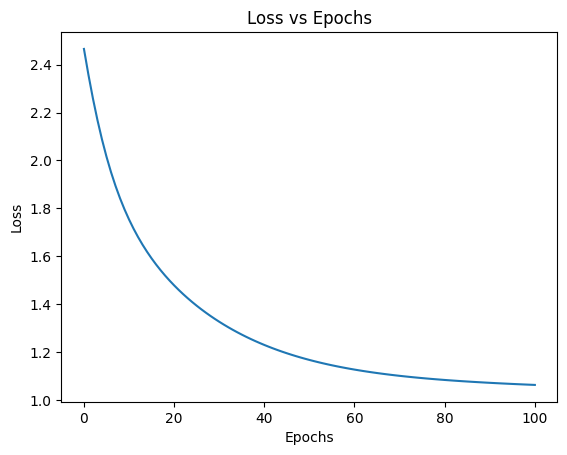

In [19]:
# plot the losses
plt.plot(loss_nist)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')


TLM R2:  0.5192532925894031
TLM RMSE:  1.1221602
TLM MAE:  0.75424147
TLM MSE:  1.2592436


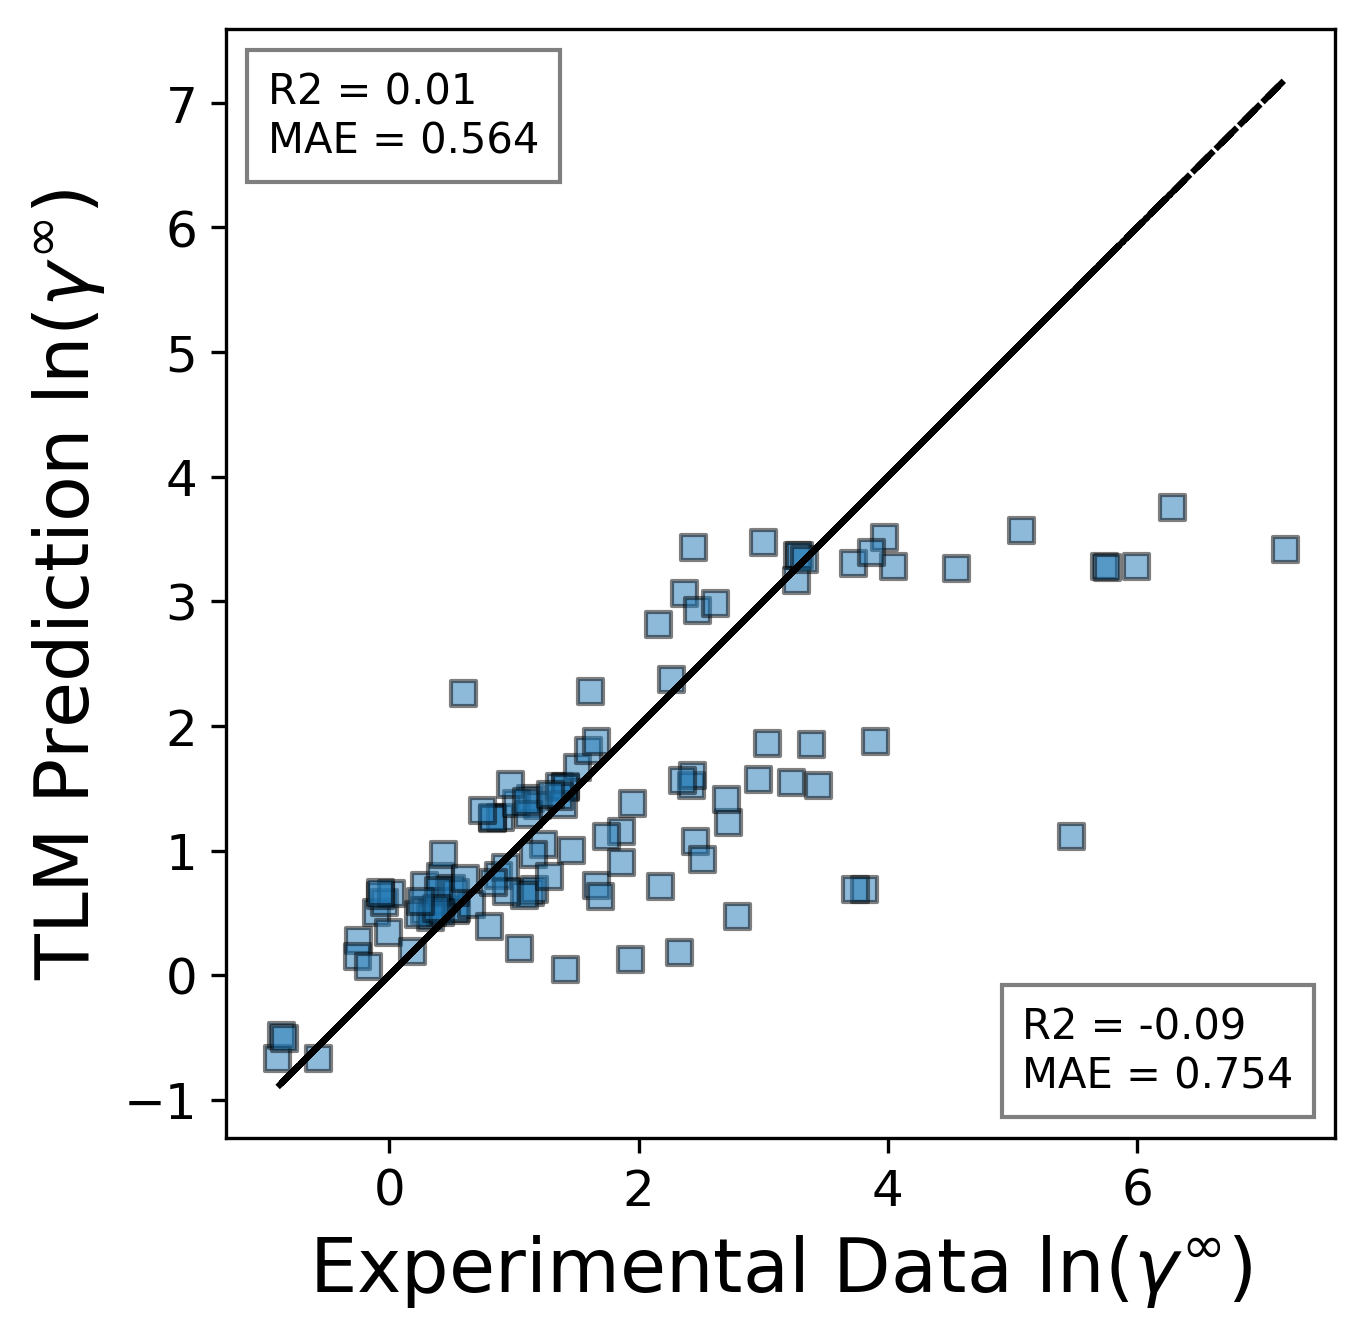

In [20]:
# plot the parity
X_train_nist = X_train_nist.to('cpu')
Y_train_nist = Y_train_nist.to('cpu')
X_test_nist = X_test_nist.to('cpu')
Y_test_nist = Y_test_nist.to('cpu')
TLM = TLM.to('cpu')
fig, ax = md.plot_parity(TLM, X_train_nist, Y_train_nist, X_test_nist, Y_test_nist)
# change the xlabel to be the nist data
ax.set_xlabel('Experimental Data $\ln(\gamma^\infty)$')
# change the ylabel to be the predicted data
ax.set_ylabel('TLM Prediction $\ln(\gamma^\infty)$')
# get the stats
tlm_r2 = r2_score(Y_test_nist, TLM(X_test_nist).detach().cpu().numpy())
tlm_rmse = np.sqrt(mean_squared_error(Y_test_nist, TLM(X_test_nist).detach().cpu().numpy()))
tlm_mae = mean_absolute_error(Y_test_nist, TLM(X_test_nist).detach().cpu().numpy())
tlm_mse = mean_squared_error(Y_test_nist, TLM(X_test_nist).detach().cpu().numpy())

# print the stats
print('TLM R2: ', tlm_r2)
print('TLM RMSE: ', tlm_rmse)
print('TLM MAE: ', tlm_mae)
print('TLM MSE: ', tlm_mse)



C:\Users\efons\AppData\Local\Temp\ipykernel_16736\2272881222.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_nist, Y_train_nist)


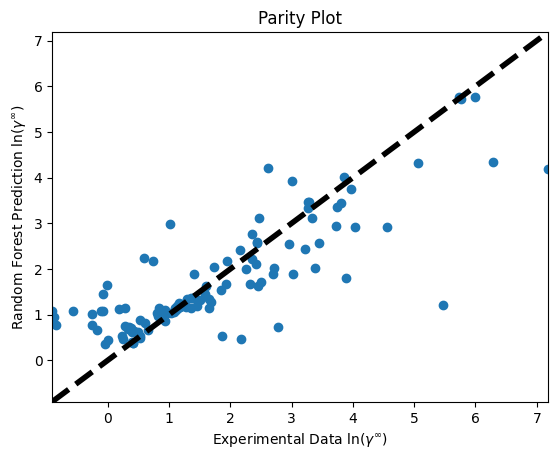

Random Forest R2:  0.6727515212954798
Random Forest MAE:  0.5938566257148494
Random Forest MSE:  0.8571781337204993
Random Forest RMSE:  0.9258391511059031


In [21]:
# use sklearn random forest to predict the nist data
rf = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=-1)
rf.fit(X_train_nist, Y_train_nist)
Y_pred_rf = rf.predict(X_test_nist)
# plot the parity
fig, ax = plt.subplots()
ax.scatter(Y_test_nist, Y_pred_rf)
ax.set_xlabel('Experimental Data $\ln(\gamma^\infty)$')
ax.set_ylabel('Random Forest Prediction $\ln(\gamma^\infty)$')
ax.set_title('Parity Plot')
ax.plot([Y_test_nist.min(), Y_test_nist.max()], [Y_test_nist.min(), Y_test_nist.max()], 'k--', lw=4)
ax.set_xlim([Y_test_nist.min(), Y_test_nist.max()])
ax.set_ylim([Y_test_nist.min(), Y_test_nist.max()])
plt.show()

# get the stats
rf_r2 = r2_score(Y_test_nist, Y_pred_rf)
rf_mae = mean_absolute_error(Y_test_nist, Y_pred_rf)
rf_mse = mean_squared_error(Y_test_nist, Y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(Y_test_nist, Y_pred_rf))
print('Random Forest R2: ', rf_r2)
print('Random Forest MAE: ', rf_mae)
print('Random Forest MSE: ', rf_mse)
print('Random Forest RMSE: ', rf_rmse)


In [22]:
v1 = test['Volume_1'].to_numpy().reshape(-1,1)
v2 = test['Volume_2'].to_numpy().reshape(-1,1)
a1 = test['Area_1'].to_numpy().reshape(-1,1)
a2 = test['Area_2'].to_numpy().reshape(-1,1)
sigma_1 = np.concatenate(test['sigma_solute'].to_numpy()).reshape(-1,51)
sigma_2 = np.concatenate(test['sigma_solvent'].to_numpy()).reshape(-1,51)

# calculate all the ln_gamma1 using COSMO-SAC
cosmo_pred = []
for i in range(len(v1)):
    cosmo = sf.COSMO(sigma_1[i, :], sigma_2[i, :], v1[i], v2[i], x1=np.array([2.5e-9]))
    cosmo_pred.append(cosmo.get_gamma()[0])

# only plot the values that are not nan
cosmo_pred = np.array(cosmo_pred)
cosmo_pred


array([[ 2.86376698],
       [ 1.97723986],
       [ 0.17268652],
       [ 1.97723986],
       [-0.00843627],
       [ 2.86376698],
       [ 2.98748721],
       [ 0.75472617],
       [ 8.24303924],
       [ 7.01093508],
       [ 0.23577487],
       [ 1.05937664],
       [ 2.57057645],
       [ 1.88814827],
       [ 0.06108096],
       [ 0.05679335],
       [ 7.01093508],
       [ 1.06869631],
       [ 4.1642707 ],
       [ 1.23193977],
       [-2.99825549],
       [-0.15715029],
       [ 2.86812948],
       [-1.95110498],
       [-0.1318214 ],
       [-2.1306423 ],
       [-1.79879476],
       [ 0.09886397],
       [-0.77847734],
       [-2.99825549],
       [ 0.92526309],
       [ 0.01957647],
       [ 0.64330491],
       [-0.55130784],
       [ 0.2849291 ],
       [ 1.52353628],
       [ 1.09330203],
       [ 2.25631693],
       [-0.01384667],
       [-0.86118015],
       [ 0.6182637 ],
       [ 0.49196745],
       [ 0.38370497],
       [ 0.487438  ],
       [ 3.69487695],
       [ 2

In [23]:
print(cosmo_pred.shape)
print(Y_test_nist.shape)

(115, 1)
torch.Size([115, 1])


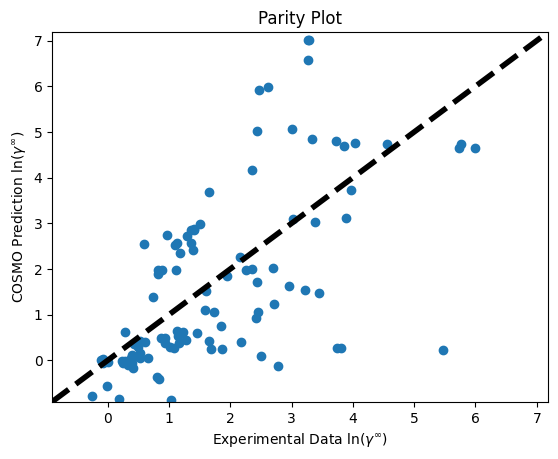

COSMO R2:  -0.0059002182105227785
COSMO MAE:  1.2235516684566474
COSMO MSE:  2.6348042171748958
COSMO RMSE:  1.623208001820745


In [24]:
Y_test_nist2 = Y_test_nist[~np.isnan(cosmo_pred)]
cosmo_pred2 = cosmo_pred[~np.isnan(cosmo_pred)]


# plot the parity
fig, ax = plt.subplots()
ax.scatter(Y_test_nist2, cosmo_pred2)
ax.set_xlabel('Experimental Data $\ln(\gamma^\infty)$')
ax.set_ylabel('COSMO Prediction $\ln(\gamma^\infty)$')
ax.set_title('Parity Plot')
ax.plot([Y_test_nist2.min(), Y_test_nist2.max()], [Y_test_nist2.min(), Y_test_nist2.max()], 'k--', lw=4)
ax.set_xlim([Y_test_nist2.min(), Y_test_nist2.max()])
ax.set_ylim([Y_test_nist2.min(), Y_test_nist2.max()])
plt.show()

# get the stats
cosmo_r2 = r2_score(Y_test_nist2, cosmo_pred2)
cosmo_mae = mean_absolute_error(Y_test_nist2, cosmo_pred2)
cosmo_mse = mean_squared_error(Y_test_nist2, cosmo_pred2)
cosmo_rmse = np.sqrt(mean_squared_error(Y_test_nist2, cosmo_pred2))
print('COSMO R2: ', cosmo_r2)
print('COSMO MAE: ', cosmo_mae)
print('COSMO MSE: ', cosmo_mse)
print('COSMO RMSE: ', cosmo_rmse)

In [25]:
# tabulate all the states of each model (TLM, random forest, and COSMO)
from tabulate import tabulate
# make the table
table = [['TLM', tlm_r2, tlm_mae, tlm_mse, tlm_rmse], ['Random Forest', rf_r2, rf_mae, rf_mse, rf_rmse], ['COSMO', cosmo_r2, cosmo_mae, cosmo_mse, cosmo_rmse]]
print(tabulate(table, headers=['Model', 'R2', 'MAE', 'MSE', 'RMSE']))

# print an explation of why a R2 value can be negative
print('''
R2 can be negative if the model is worse than the mean of the data.
This can happen if the model is not able to capture the variance of the data.
''')


Model                   R2       MAE       MSE      RMSE
-------------  -----------  --------  --------  --------
TLM             0.519253    0.754241  1.25924   1.12216
Random Forest   0.672752    0.593857  0.857178  0.925839
COSMO          -0.00590022  1.22355   2.6348    1.62321

R2 can be negative if the model is worse than the mean of the data.
This can happen if the model is not able to capture the variance of the data.



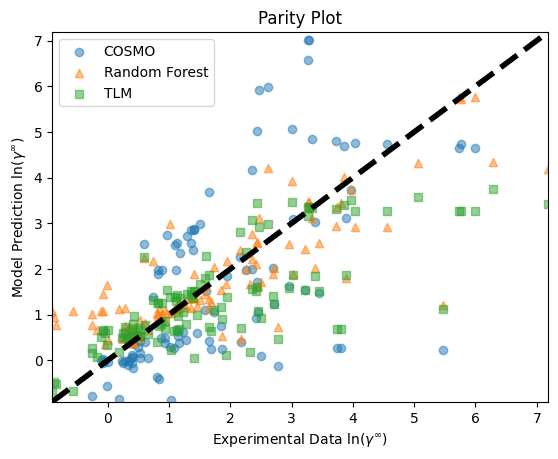

In [26]:
# make a parity with all three models, change the shape of the marker to make it easier to see, alpha = 0.5 to make it easier to see
fig, ax = plt.subplots()
pred = TLM(X_test_nist).detach().numpy().reshape(-1)
ax.scatter(Y_test_nist2, cosmo_pred2, marker='o', alpha=0.5, label='COSMO')
ax.scatter(Y_test_nist, Y_pred_rf, marker='^', alpha=0.5, label='Random Forest')
ax.scatter(Y_test_nist, pred, marker='s', alpha=0.5, label='TLM')
ax.set_xlabel('Experimental Data $\ln(\gamma^\infty)$')
ax.set_ylabel('Model Prediction $\ln(\gamma^\infty)$')
ax.set_title('Parity Plot')
ax.plot([Y_test_nist.min(), Y_test_nist.max()], [Y_test_nist.min(), Y_test_nist.max()], 'k--', lw=4)
ax.set_xlim([Y_test_nist.min(), Y_test_nist.max()])
ax.set_ylim([Y_test_nist.min(), Y_test_nist.max()])
ax.legend()
plt.show()
